In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
iris = datasets.load_iris()
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


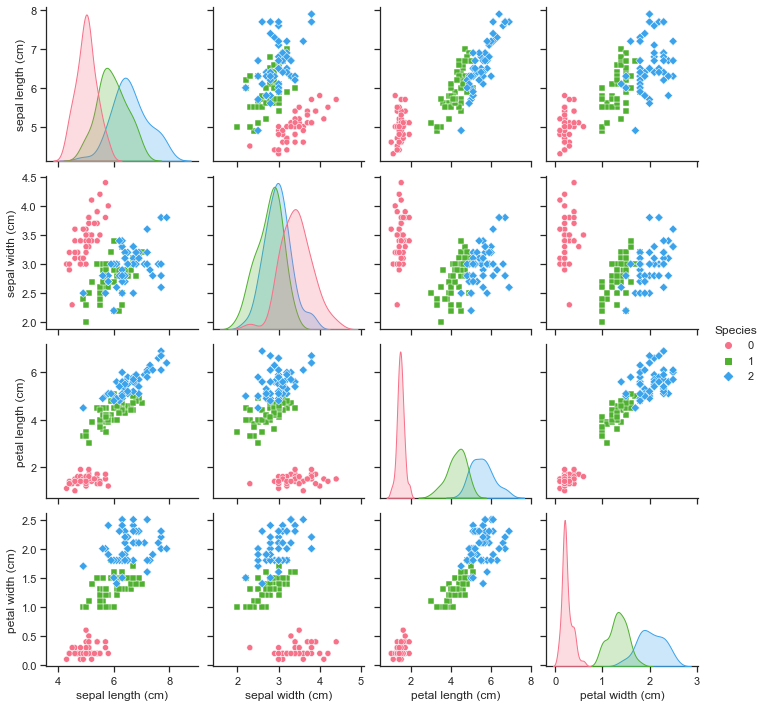

In [3]:
plt.rcParams['figure.figsize'] = [15, 15]

dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
dataframe['Species'] = iris['target']
#print(dataframe)

sns.set(style="ticks", color_codes=True)
sns.pairplot(dataframe, hue= 'Species', palette=sns.color_palette("husl", 3), markers=["o", "s", "D"])

Загружаем 2 фичи

In [18]:
X = iris.data[:, [2, 3]]
y = iris.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

metric = get_dst_metric(2)
kernel = triangular_window
k = 100
max_distance = max([max([metric(y, x) for x in X_train]) for y in X_train]) * 2

Точность на тесте

In [20]:
print('accuracy: ',  measure_accuracy(X_train, y_train, X_train, y_train, k, metric, kernel, max_distance))

accuracy:  0.9428571428571428


Точность на самих себе

In [21]:
print('accuracy: ', measure_accuracy(X_train, y_train, X_train, y_train, k, metric, kernel, max_distance))

accuracy:  0.9428571428571428


Теперь попробуем выкинуть лишние точки 

In [22]:
weights = remove_redundant_points(X_train, y_train, k, metric, kernel, max_distance, 30)
non_zero_ids = [i for i in range(weights.shape[0]) if weights[i] > 0]

reduced_x = X_train[non_zero_ids]
reduced_y = y_train[non_zero_ids]
reduced_weights = weights[non_zero_ids]

In [23]:
print(reduced_weights)
print(reduced_y)

[ 1.  2.  4.  1.  2.  4.  1. 27.  3.  3.  3.  1. 26.  1.  5.  6.  8.  2.
  1.  7. 30. 21.  3. 21.  8.  8.  1.  8.  9. 16.  4.]
[1 2 1 2 1 0 0 0 0 2 1 0 1 0 2 0 1 2 1 2 2 1 0 2 1 0 0 1 0 2 1]


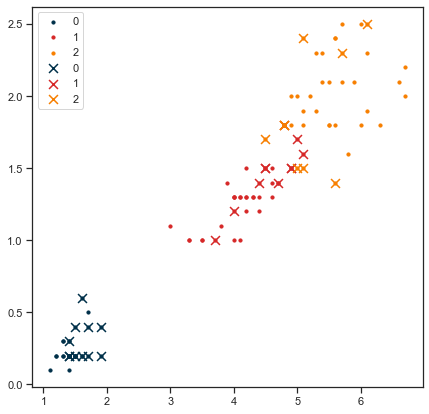

In [24]:
plt.rcParams['figure.figsize'] = [7, 7]

fig, ax = plt.subplots()

scatter_markers(ax, X_train[:, 0], X_train[:, 1], y_train, 10, 'o')
scatter_markers(ax, reduced_x[:, 0], reduced_x[:, 1], reduced_y, 80, 'x')

ax.legend()
plt.show()

Какова точность на Train по "выжившим" точкам?

In [25]:
print('accuracy after: ', measure_accuracy(X_train, y_train, reduced_x, reduced_y, k, metric, kernel, 
                                           max_distance, reduced_weights))

accuracy after:  0.9523809523809523


Точность на Test?

In [26]:
print('accuracy after: ', measure_accuracy(X_test, y_test, reduced_x, reduced_y, k, metric, kernel, 
                                           max_distance, reduced_weights))

accuracy after:  0.9555555555555556


Как выглядели данные на всё пространсве до отсечения "мусора"

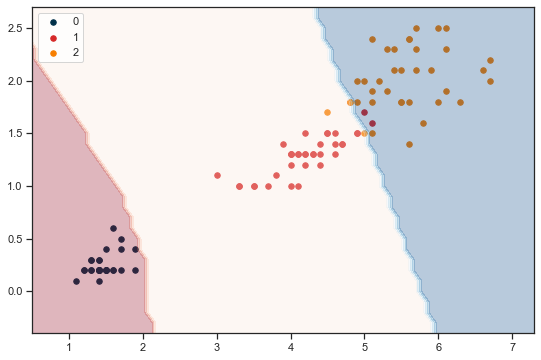

In [27]:
plt.rcParams['figure.figsize'] = [9, 6]

plot_map(X_test, y_test, X_train, y_train,  k, metric, kernel, max_distance)
plt.legend()
plt.show()

А после отсечения?

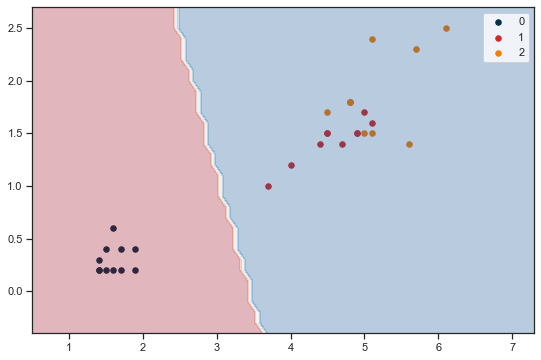

In [28]:
plot_map(X_test, y_test, reduced_x, reduced_y,  k, metric, kernel, max_distance)
plt.legend()
plt.show()

Прогоним классификатор на тесте и выведем правильные и ошибочные предсказания

In [29]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

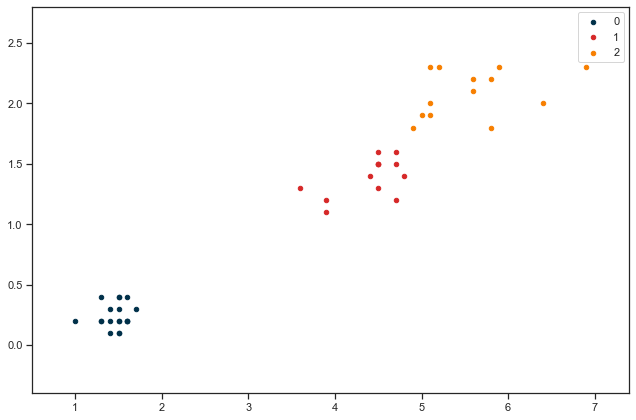

In [30]:
test_predictions = predict_array(X_test, X_train, y_train, k, metric, kernel, max_distance)
plot_correct_wrong(test_predictions, X_test, y_test, True)

In [31]:
measure_knn(iris, 4, 100, get_dst_metric(2), triangular_window, 0.4, max_distance)

accuracy on self:  0.9111111111111111
accuracy on test:  0.95
accuracy on itself after weights:  1.0
accuracy on test after weights:  0.9833333333333333


In [32]:
measure_knn(iris, 4, 100, get_dst_metric(2), triangular_window, 0.4, max_distance)

accuracy on self:  0.9111111111111111
accuracy on test:  0.95
accuracy on itself after weights:  1.0
accuracy on test after weights:  0.9833333333333333


<h3>На гаусовом окне точность на разных шафлах</h3>

In [33]:
spread = [measure_knn_data(iris, 4, 100, get_dst_metric(2), gauss_window, 0.4, max_distance, True, 30) for i in range(20)]

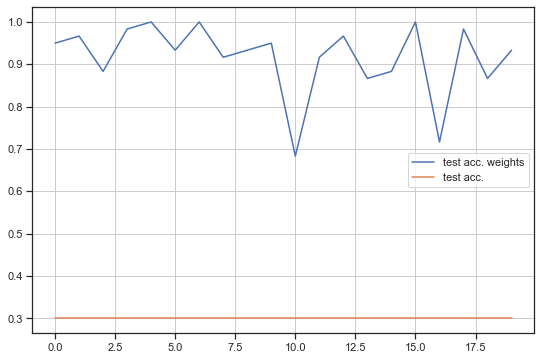

In [34]:
#print(np.array(spread)[:,:])
plt.plot(np.array(spread)[:, 3], label='test acc. weights')
plt.plot(np.array(spread)[:, 1], label='test acc.')

plt.legend()
plt.grid()
plt.show()

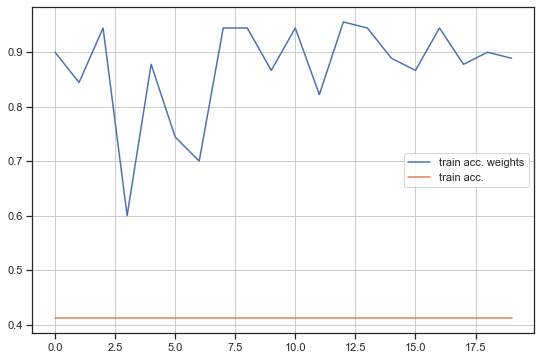

In [39]:
plt.plot(np.array(spread)[:, 2], label='train acc. weights')
plt.plot(np.array(spread)[:, 0], label='train acc.')

plt.legend()
plt.grid()
plt.show()

<h3>На окне епанчикова точность на разных шафлах</h3>

In [36]:
spread = [measure_knn_data(iris, 4, 100, get_dst_metric(2), epanchinkow_window, 0.4, max_distance, True, 30) for i in range(20)]

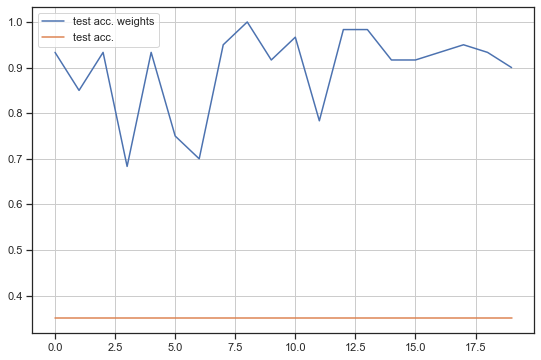

In [40]:
#print(np.array(spread)[:,:])
plt.plot(np.array(spread)[:, 3], label='test acc. weights')
plt.plot(np.array(spread)[:, 1], label='test acc.')

plt.legend()
plt.grid()
plt.show()

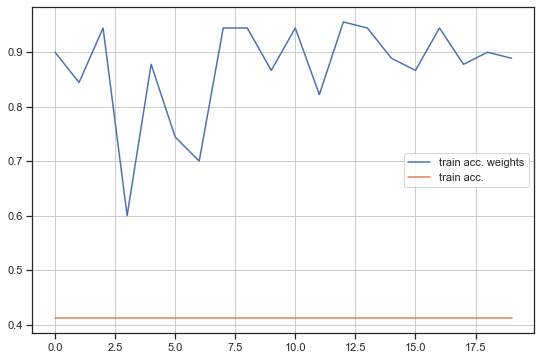

In [41]:
plt.plot(np.array(spread)[:, 2], label='train acc. weights')
plt.plot(np.array(spread)[:, 0], label='train acc.')

plt.legend()
plt.grid()
plt.show()